In [2]:
#Dependencies
!pip install omdb
import pandas as pd
import numpy as np
import os as os
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import omdb
import time
from pprint import pprint
from config import omdb_key
!pip install omdb

#Pulling in Data
csv_path = "Resources/tmdb_5000_credits.csv"
csv_path2 = "Resources/tmdb_5000_movies.csv"
actors = pd.read_csv(csv_path, encoding="utf-8")
movies = pd.read_csv(csv_path2, encoding="utf-8")


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [3]:
actors.columns = ['ID', 'Title', 'Cast', 'Crew']

In [4]:
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Brad Pitt


In [5]:
selected_actor = actors[actors['Cast'].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Brad Pitt has been in 38 movies


In [6]:
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["Title"])
movies_played_in

Brad Pitt has been in the following movies


,Title
0,World War Z
1,The Curious Case of Benjamin Button
2,Troy
3,Happy Feet Two
4,Megamind
5,Ocean's Twelve
6,Mr. & Mrs. Smith
7,Spy Game
8,The Devil's Own
9,Ocean's Eleven


In [7]:
movies_played_in["Year Released"] = ""
movies_played_in["Rated"] = ""
movies_played_in["Rotten Tomato"] = ""
movies_played_in["Meta Score"] = ""
movies_played_in["Plot Sentiment"] = ""
movies_played_in["Plot"] = ""
movies_played_in["Genre"] = ""
movies_played_in.head()

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre
0,World War Z,,,,,,,
1,The Curious Case of Benjamin Button,,,,,,,
2,Troy,,,,,,,
3,Happy Feet Two,,,,,,,
4,Megamind,,,,,,,


In [8]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

for index, row in movies_played_in.iterrows():
    movie_pull = row["Title"]
         
    
    try:
        url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_pull, omdb_key)
        #Print log of movie being processed
        print(f"Now retrieving Movie Data for: " + movie_pull)
        #Run requests to API
        movie_data = requests.get(url).json()
        pprint(movie_data)
        # Rating = movie_data["Ratings"]
        RT = movie_data["Ratings"][1]["Value"]
        Meta = movie_data["Metascore"]
        Year = movie_data["Year"]
        Rated = movie_data["Rated"]
        Plot = movie_data["Plot"]
        Sent = analyzer.polarity_scores(Plot)["compound"]
        Genre = movie_data["Genre"]
        #place in df
        movies_played_in.set_value(index, "Rated", Rated)
        movies_played_in.set_value(index, "Year Released", Year)
        movies_played_in.set_value(index, "Rotten Tomato", RT)
        movies_played_in.set_value(index, "Meta Score", Meta)
        movies_played_in.set_value(index, "Plot", Plot)
        movies_played_in.set_value(index, "Plot Sentiment", Sent)
        movies_played_in.set_value(index, "Genre", Genre)
        
    except:
        movies_played_in.set_value(index, "Year Released", "N/A")
        movies_played_in.set_value(index, "Rated,", "N/A")
        movies_played_in.set_value(index, "Rotten Tomato", "N/A")
        movies_played_in.set_value(index, "Meta Score", "N/A")
        movies_played_in.set_value(index, "Plot Sentiment", "N/A")
        movies_played_in.set_value(index, "Plot", "N/A")
        movies_played_in.set_value(index, "Genre", "N/A")
        
        
pprint(movie_data)
movies_played_in.sort_values(["Year Released"], ascending=True, inplace=True)
#family_and_generosity = happiness_df.sort_values(["Family","Generosity"], ascending=False)
movies_played_in = movies_played_in.reset_index(drop=True)
movies_played_in.head()  

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: World War Z
{'Actors': 'Brad Pitt, Mireille Enos, Daniella Kertesz, James Badge Dale',
 'Awards': '3 wins & 24 nominations.',
 'BoxOffice': '$202,351,611',
 'Country': 'USA',
 'DVD': '17 Sep 2013',
 'Director': 'Marc Forster',
 'Genre': 'Action, Adventure, Horror',
 'Language': 'English, Spanish, Hebrew, Arabic',
 'Metascore': '63',
 'Plot': 'Former United Nations employee Gerry Lane traverses the world in a '
         'race against time to stop the Zombie pandemic that is toppling '
         'armies and governments, and threatening to destroy humanity itself.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTg0NTgxMjIxOF5BMl5BanBnXkFtZTcwMDM0MDY1OQ@@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '66%'},
            

C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future rele

{'Actors': 'Julian Glover, Brian Cox, Nathan Jones, Adoni Maropis',
 'Awards': 'Nominated for 1 Oscar. Another 4 wins & 21 nominations.',
 'BoxOffice': '$132,500,000',
 'Country': 'USA, Malta, UK',
 'DVD': '04 Jan 2005',
 'Director': 'Wolfgang Petersen',
 'Genre': 'Drama, History, Romance',
 'Language': 'English',
 'Metascore': '56',
 'Plot': "An adaptation of Homer's great epic, the film follows the assault on "
         'Troy by the united Greek forces and chronicles the fates of the men '
         'involved.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTk5MzU1MDMwMF5BMl5BanBnXkFtZTcwNjczODMzMw@@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.2/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '54%'},
             {'Source': 'Metacritic', 'Value': '56/100'}],
 'Released': '14 May 2004',
 'Response': 'True',
 'Runtime': '163 min',
 'Title': 'Troy',
 'Type': 'movie',
 'Website': 'htt

{'Actors': 'George Clooney, Cecelia Ann Birt, Paul L. Nolan, Carol Florence',
 'Awards': '4 wins & 20 nominations.',
 'BoxOffice': '$183,349,128',
 'Country': 'USA',
 'DVD': '07 May 2002',
 'Director': 'Steven Soderbergh',
 'Genre': 'Crime, Thriller',
 'Language': 'English, Italian, Cantonese',
 'Metascore': '74',
 'Plot': 'Danny Ocean and his eleven accomplices plan to rob three Las Vegas '
         'casinos simultaneously.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BYzVmYzVkMmUtOGRhMi00MTNmLThlMmUtZTljYjlkMjNkMjJkXkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '82%'},
             {'Source': 'Metacritic', 'Value': '74/100'}],
 'Released': '07 Dec 2001',
 'Response': 'True',
 'Runtime': '116 min',
 'Title': "Ocean's Eleven",
 'Type': 'movie',
 'Website': 'http://oceans11.warnerbros.com'

{'Actors': 'Brad Pitt, Christian Slater, Virginia McCollam, John McConnell',
 'Awards': 'Nominated for 2 Oscars. Another 22 wins & 25 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '28 Aug 1997',
 'Director': 'Neil Jordan',
 'Genre': 'Drama, Horror',
 'Language': 'English, French',
 'Metascore': '59',
 'Plot': 'A vampire tells his epic life story: love, betrayal, loneliness, and '
         'hunger.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BYThmYjJhMGItNjlmOC00ZDRiLWEzNjUtZjU4MjA3MzY0MzFmXkEyXkFqcGdeQXVyNTI4MjkwNjA@._V1_SX300.jpg',
 'Production': 'Warner Home Video',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.6/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '62%'},
             {'Source': 'Metacritic', 'Value': '59/100'}],
 'Released': '11 Nov 1994',
 'Response': 'True',
 'Runtime': '123 min',
 'Title': 'Interview with the Vampire: The Vampire Chronicles',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Anne Rice 

{'Actors': 'Brad Pitt, Mary-Louise Parker, Brooklynn Proulx, Dustin Bollinger',
 'Awards': 'Nominated for 2 Oscars. Another 25 wins & 65 nominations.',
 'BoxOffice': '$3,900,000',
 'Country': 'USA, Canada, UK',
 'DVD': '05 Feb 2008',
 'Director': 'Andrew Dominik',
 'Genre': 'Biography, Crime, Drama',
 'Language': 'English, Danish',
 'Metascore': '68',
 'Plot': "Robert Ford, who's idolized Jesse James since childhood, tries hard "
         'to join the reforming gang of the Missouri outlaw, but gradually '
         'becomes resentful of the bandit leader.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTY2NDI2MTc2NV5BMl5BanBnXkFtZTcwNjA2NTQzMw@@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.5/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '76%'},
             {'Source': 'Metacritic', 'Value': '68/100'}],
 'Released': '19 Oct 2007',
 'Response': 'True',
 'Runtime': '160 min',
 'Title'

C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future rele

{'Actors': 'Chiwetel Ejiofor, Dwight Henry, Dickie Gravois, Bryan Batt',
 'Awards': 'Won 3 Oscars. Another 235 wins & 326 nominations.',
 'BoxOffice': '$50,628,650',
 'Country': 'USA, UK',
 'DVD': '04 Mar 2014',
 'Director': 'Steve McQueen',
 'Genre': 'Biography, Drama, History',
 'Language': 'English',
 'Metascore': '96',
 'Plot': 'In the antebellum United States, Solomon Northup, a free black man '
         'from upstate New York, is abducted and sold into slavery.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BZjFkOGNjZjAtMzZjNS00ZjI2LTkwNjEtOWQ3NzQzOTBlMDA5XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg',
 'Production': 'Fox Searchlight',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '96%'},
             {'Source': 'Metacritic', 'Value': '96/100'}],
 'Released': '08 Nov 2013',
 'Response': 'True',
 'Runtime': '134 min',
 'Title': '12 Years a Slave',
 'Type': 'movie',
 'Website': 'http://www

{'Actors': 'David Duchovny, Nicky Katt, Catherine Keener, Mary McCormack',
 'Awards': '1 nomination.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '11 Feb 2003',
 'Director': 'Steven Soderbergh',
 'Genre': 'Comedy, Romance',
 'Language': 'English',
 'Metascore': '45',
 'Plot': 'A day in the life of a group of men and women in Hollywood, in the '
         "hours leading up to a friend's birthday party.",
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BNzE5NjAwNDk3Nl5BMl5BanBnXkFtZTYwOTk3MjM3._V1_SX300.jpg',
 'Production': 'Miramax Films',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '4.7/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '39%'},
             {'Source': 'Metacritic', 'Value': '45/100'}],
 'Released': '02 Aug 2002',
 'Response': 'True',
 'Runtime': '101 min',
 'Title': 'Full Frontal',
 'Type': 'movie',
 'Website': 'http://www.fullfrontal.com',
 'Writer': 'Coleman Hough',
 'Year': '2002',
 'imdbID': 'tt0290212',
 'imdbRating': '4

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre,"Rated,"
0,Johnny Suede,1991,R,36%,53,0.5719,A struggling young musician and devoted fan of...,"Comedy, Music, Romance",NaN
1,True Romance,1993,R,92%,57,-0.765,"In Detroit, a lonely pop culture geek marries ...","Crime, Drama, Romance",NaN
2,Legends of the Fall,1994,R,45/100,45,-0.6249,"In the early 1900s, three brothers and their f...","Drama, Romance, War",NaN
3,Interview with the Vampire,1994,R,62%,59,-0.5267,"A vampire tells his epic life story: love, bet...","Drama, Horror",NaN
4,Se7en,1995,R,80%,65,-0.8074,"Two detectives, a rookie and a veteran, hunt a...","Crime, Drama, Mystery",NaN


In [9]:
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('%','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('/100','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('N/A','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('%','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('NaN','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('/100','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('N/A','')
#movies_played_in['Plot Sentiment'] = movies_played_in['Plot Sentiment'].str.replace('N/A','')
movies_played_in['Year Released'] = movies_played_in['Year Released'].str.replace('N/A','')


In [10]:
movies_played_in["Meta Score"] = pd.to_numeric(movies_played_in["Meta Score"])
movies_played_in['Rotten Tomato'] = pd.to_numeric(movies_played_in['Rotten Tomato'])
movies_played_in['Plot Sentiment'] = pd.to_numeric(movies_played_in['Plot Sentiment'])
movies_played_in['Year Released'] = pd.to_numeric(movies_played_in['Year Released'])

ValueError: Unable to parse string "N/A" at position 37

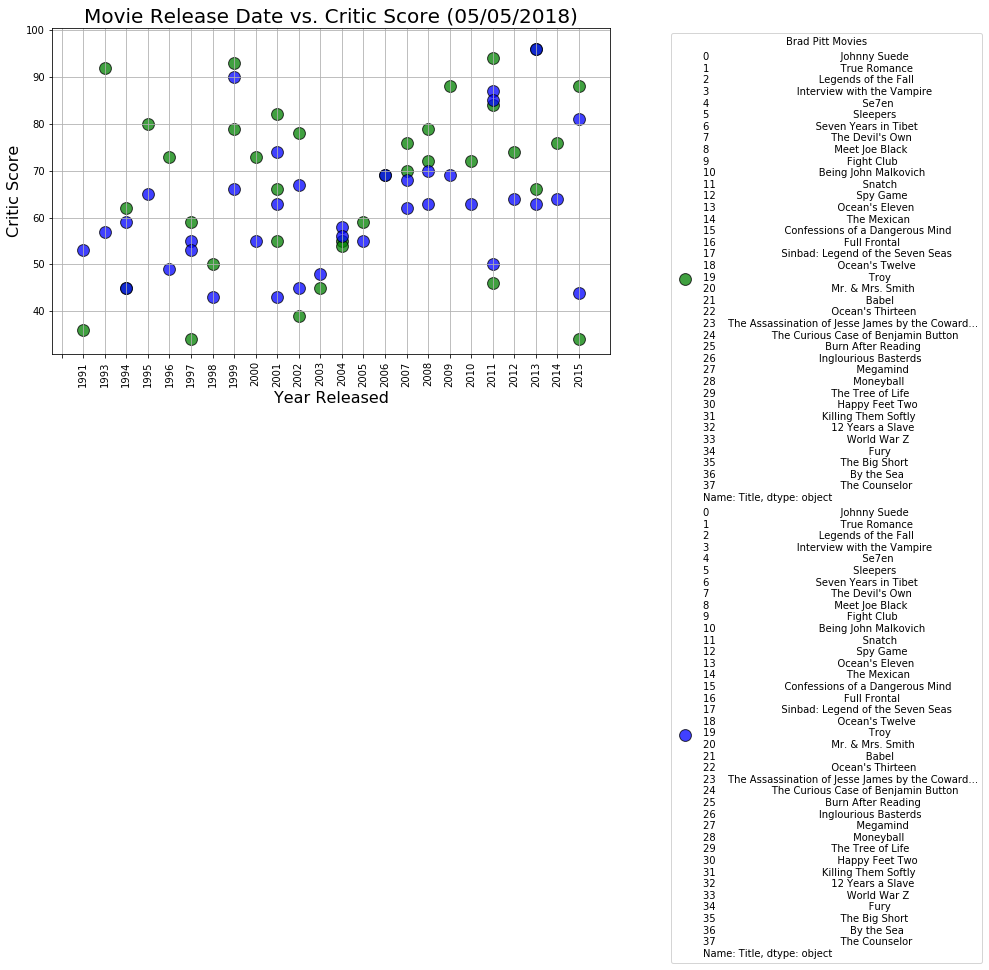

In [11]:
plt.figure(figsize=(10,6))
plt.title("Movie Release Date vs. Critic Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Critic Score", fontsize=16)
#set_xlim(1920, 2017)
plt.scatter(movies_played_in["Year Released"], movies_played_in["Rotten Tomato"], color= "green", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.scatter(movies_played_in["Year Released"], movies_played_in["Meta Score"], color= "Blue", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")
plt.grid()
plt.show()

ValueError: could not convert string to float: 'N/A'

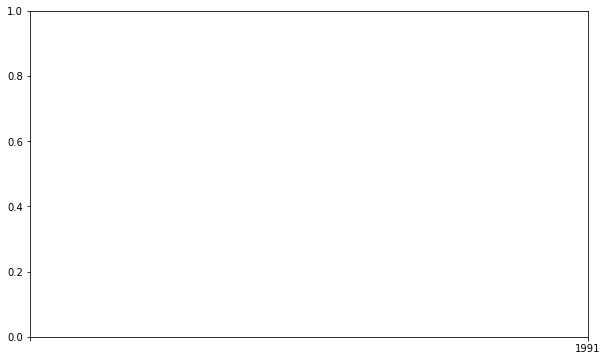

In [12]:
#Set size of bar plots
plt.figure(figsize=(10,6))

plt.plot(movies_played_in["Year Released"],movies_played_in["Plot Sentiment"], color= "Red", marker= "o", linestyle= "dashed",
linewidth= 2, markersize= 6)

#Aesthetics
plt.title("Release Date vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Release Date", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
#plt.savefig("Images/Movie_Release_Date_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

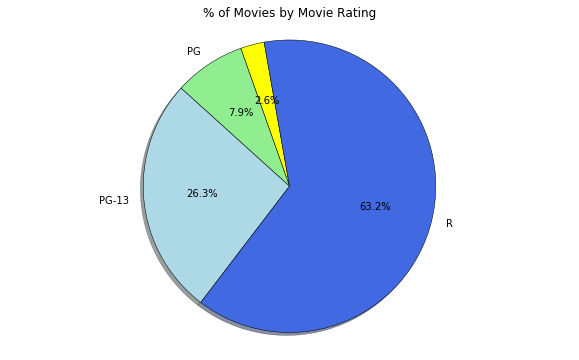

In [13]:
#Set size of pie chart
plt.figure(figsize=(10,6))

#Group "final" dataframe by "Rated"
rating = movies_played_in.groupby("Rated").count()
final_rating = pd.DataFrame(rating)

total_movies = rating["Title"]

#Set pie chart labels
labels = total_movies.index

#Define color and explode values for all pie chart use
colors = ["yellow", "lightgreen", "lightblue", "royalblue"]
#explode = [.00, .00, .00]

#Create pie chart for "% of Total Fares by City Type"
plt.pie(total_movies, startangle = 100, colors = colors, labels = labels, 
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#Save plot as PNG image
#plt.savefig("Images/Percent_of_Movies_by_Rating.png", bbox_inches= "tight")

#Format display
plt.title("% of Movies by Movie Rating")
plt.axis("equal")
plt.show()